In [1]:
import csv
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import statsmodels.api as sm


# Data wrangling - removing uneccessary data and merging to one dataframe

In [9]:
df6 = pd.read_csv("GOGL.csv", thousands=',')
df6 = df6.drop(columns=['Low', 'High', 'Open','Adj Close', "Volume"])
df6.rename(columns={'Close': 'GOGL'}, inplace=True)
#df6.head()

In [10]:
df0 = pd.read_csv("S&P.csv", thousands=',')
df0 = df0.drop(columns=['Low', 'High', 'Open', 'Vol.', 'Change %'])
df0.rename(columns={'Price': 'S&P500'}, inplace=True)
#df0.head()

df1 = pd.read_csv("BDRY.csv", thousands=',')
df1 = df1.drop(columns=['Low', 'High', 'Open', 'Vol.', 'Change %'])
df1.rename(columns={'Price': 'BDRY'}, inplace=True)
#df1.head()

df2 = pd.read_csv("BRENT_FUTURES.csv", thousands=',')
df2 = df2.drop(columns=['Low', 'High', 'Open', 'Vol.', 'Change %'])
df2.rename(columns={'Price': 'BRENT_FUTURES'}, inplace=True)
#df2.head()

df3 = pd.read_csv("CAPESIZE.csv", thousands=',')
df3= df3.drop(columns=['Low', 'High', 'Open', 'Vol.', 'Change %'])
df3.rename(columns={'Price': 'CAPESIZE'}, inplace=True)
#df3.head()

df4 = pd.read_csv("CNY_USD.csv", thousands=',')
df4 = df4.drop(columns=['Low', 'High', 'Open', 'Change %'])
df4.rename(columns={'Price': 'CNY_USD'}, inplace=True)
#df4.head()

df5 = pd.read_csv("EUR_USD.csv", thousands=',')
df5 = df5.drop(columns=['Low', 'High', 'Open','Change %'])
df5.rename(columns={'Price': 'EUR_USD'}, inplace=True)
#df5.head()

df6 = pd.read_csv("GOGL.csv", thousands=',')
df6 = df6.drop(columns=['Low', 'High', 'Open','Adj Close', "Volume"])
df6.rename(columns={'Close': 'GOGL'}, inplace=True)
#df6.head()

df7 = pd.read_csv("ETF.csv")
df7 = df7.drop(columns=['Low', 'High', 'Open','Adj Close', 'Volume'])
df7.rename(columns={'Close': 'ETF'}, inplace=True)
#df7.head()


## Changing date format and str.replace so every date is similar when merging and so that pandas understand that its numeric

In [11]:
dfs_date = [df0, df1, df2, df3, df4, df5, df6, df7]
for df in dfs_date:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date'] = pd.to_datetime(df["Date"].dt.strftime('%Y/%m%/d%'))

df_numeric = [df0, df1, df3, df6, df7]
for df in df_numeric:
    df[df.columns[-1]] = pd.to_numeric(df[df.columns[-1]].replace(',', ''), errors='coerce')


## Merging dataframes into one and setting date as index

In [12]:
dfs_merge = [df5, df1, df2, df3, df4, df0, df6, df7]
df = reduce(lambda x,y: pd.merge(x, y, on = "Date"), dfs_merge)
df.set_index('Date')

EUR_USD    BDRY  BRENT_FUTURES  CAPESIZE  CNY_USD   S&P500  GOGL  \
Date                                                                           
2019-09-25   1.0943  2053.0          62.39    3829.0   0.1402  2984.87  5.91   
2019-09-24   1.1020  2116.0          63.10    3982.0   0.1406  2966.60  6.03   
2019-09-23   1.0993  2108.0          64.77    3903.0   0.1404  2991.78  6.06   
2019-09-20   1.1018  2131.0          64.28    3952.0   0.1410  2992.07  5.92   
2019-09-19   1.1041  2192.0          64.40    4136.0   0.1409  3006.79  6.00   
...             ...     ...            ...       ...      ...      ...   ...   
2018-03-29   1.2302  1055.0          70.27    1010.0   0.1590  2640.87  7.95   
2018-03-28   1.2308  1080.0          69.53    1065.0   0.1588  2605.00  7.66   
2018-03-27   1.2403  1117.0          70.11    1191.0   0.1592  2612.62  8.01   
2018-03-26   1.2443  1126.0          70.12    1197.0   0.1594  2658.55  8.09   
2018-03-23   1.2353  1122.0          70.45    1157.0   0.1583  2588.26  7.93   

                  ETF  
Date                   
2019-09-25  19.520000  
2019-09-24  20.570999  
2019-09-23  20.860001  
2019-09-20  20.010000  
2019-09-19  19.514999  
...               ...  
2018-03-29  22.780001  
2018-03-28  23.379999  
2018-03-27  24.080000  
2018-03-26  24.840000  
2018-03-23  24.101000  

[370 rows x 8 columns]

# Plots, visualization and regressions

### Two columns against eachother

### Creating moving averages

In [13]:
df6['GOGL_50']=df6['GOGL'].rolling(50).mean()
df6['GOGL_200']=df6['GOGL'].rolling(200).mean()
df6.plot(x='Date', y=['GOGL', 'GOGL_50', 'GOGL_200'], figsize=(16,8))

<AxesSubplot:xlabel='Date'>

### Regression against GOGL

In [23]:
X = df[['BDRY', 'S&P500', 'EUR_USD','BRENT_FUTURES','CAPESIZE',	'CNY_USD']] 
Y = df['GOGL']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -11.824597422975229
Coefficients: 
 [ 7.02127015e-04 -3.11957785e-03  2.28417466e+01  1.38455017e-01
  3.82480819e-04 -6.73295713e+01]
                            OLS Regression Results                            
Dep. Variable:                   GOGL   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     383.2
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          1.08e-153
Time:                        13:03:13   Log-Likelihood:                -324.34
No. Observations:                 370   AIC:                             662.7
Df Residuals:                     363   BIC:                             690.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|     

## Visualizing correlation table

In [14]:
gogl_corr = df.corr()
gogl_corr.head()

EUR_USD      BDRY  BRENT_FUTURES  CAPESIZE   CNY_USD  \
EUR_USD        1.000000 -0.152183       0.509689 -0.190433  0.813970   
BDRY          -0.152183  1.000000      -0.014162  0.970672 -0.411507   
BRENT_FUTURES  0.509689 -0.014162       1.000000 -0.106210  0.412554   
CAPESIZE      -0.190433  0.970672      -0.106210  1.000000 -0.420637   
CNY_USD        0.813970 -0.411507       0.412554 -0.420637  1.000000   

                 S&P500      GOGL       ETF  
EUR_USD       -0.492697  0.636417  0.549360  
BDRY           0.408491  0.378662  0.629737  
BRENT_FUTURES  0.078388  0.718849  0.481145  
CAPESIZE       0.384819  0.313686  0.578560  
CNY_USD       -0.455378  0.327760  0.173283

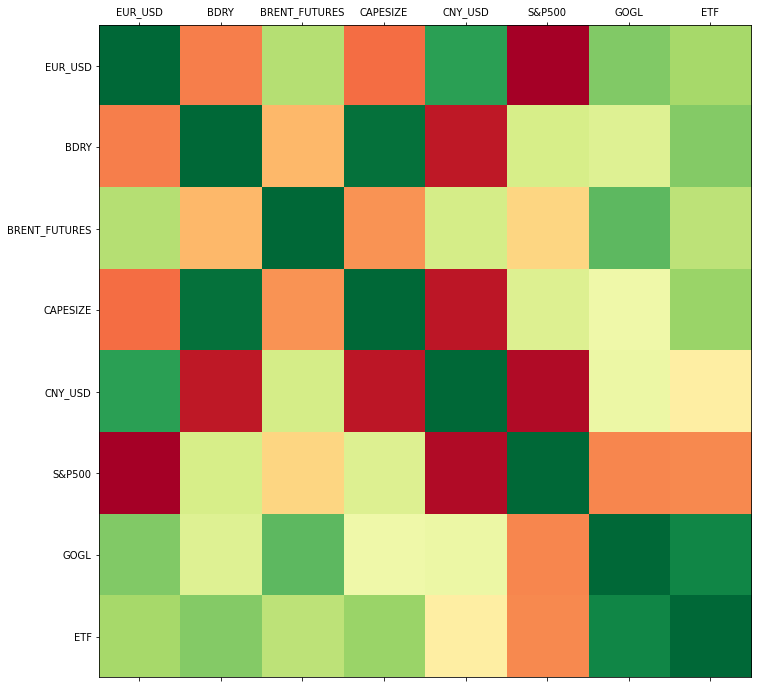

In [15]:
plt.matshow(gogl_corr)
labels = [c for c in gogl_corr.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.matshow(gogl_corr, cmap=plt.cm.RdYlGn)
